#ANÁLISIS EXPLORATORIO DE DATOS - MÓDULO 3
* **Alumno**: Fritz Reyes Valera

* **DataSet**: https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned

* **Objetivo**: Analizar Top Influencers en Instragram

##Validación de Datos y Análisis de Nulos

###1 - Importar Librerias

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


###2 - Establecer apariencia de Graficos

In [101]:
sns.set_style(style='whitegrid')



###3 - Cargar el Data

In [102]:
df_instagram = pd.read_csv('/content/instagram-users-by-country-2024.csv')
df_instagram.head()

,country,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023
0,India,392465000.0,33.1,66.9,229600000
1,United States,172606200.0,55.4,44.6,143400000
2,Indonesia,90183200.0,54.2,45.8,89150000
3,Pakistan,18593301.0,35.1,64.9,12950000
4,Nigeria,12635900.0,46.5,53.5,7100000


###4 - Analisis de Tipos de Datos

In [103]:
df_instagram.dtypes

,0
country,object
InstagramUsers_2024,float64
InstagramUsers_PctFemale_2024,float64
InstagramUsers_PctMale_2024,float64
InstagramUsers2023,int64


In [104]:
df_instagram.dtypes.value_counts()

,count
float64,3
object,1
int64,1


In [105]:
df_instagram.shape

(226, 5)

###5 - Análisis de Valores Nulos

In [106]:
df_instagram.isnull().any()

,0
country,False
InstagramUsers_2024,True
InstagramUsers_PctFemale_2024,True
InstagramUsers_PctMale_2024,True
InstagramUsers2023,False


In [107]:
df_instagram.isnull().sum().sort_values(ascending=False)

,0
InstagramUsers_2024,21
InstagramUsers_PctFemale_2024,21
InstagramUsers_PctMale_2024,21
country,0
InstagramUsers2023,0


In [108]:
plot_null_tiktok = df_instagram.isnull().melt(value_name='missing')
plot_null_tiktok

,variable,missing
0,country,False
1,country,False
2,country,False
3,country,False
4,country,False
...,...,...
1125,InstagramUsers2023,False
1126,InstagramUsers2023,False
1127,InstagramUsers2023,False
1128,InstagramUsers2023,False


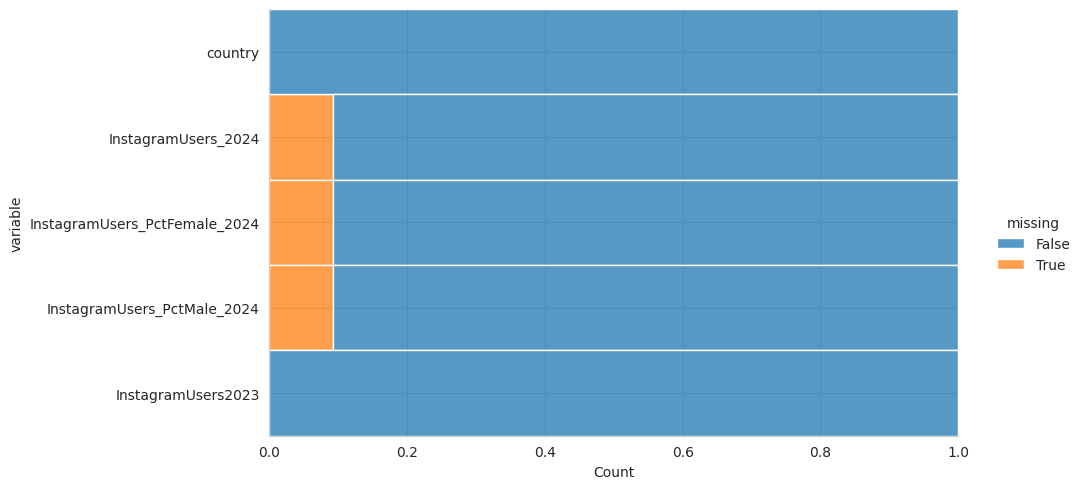

In [109]:
sns.displot(data=plot_null_tiktok,y='variable',hue='missing',aspect=2,multiple='fill')
plt.show()

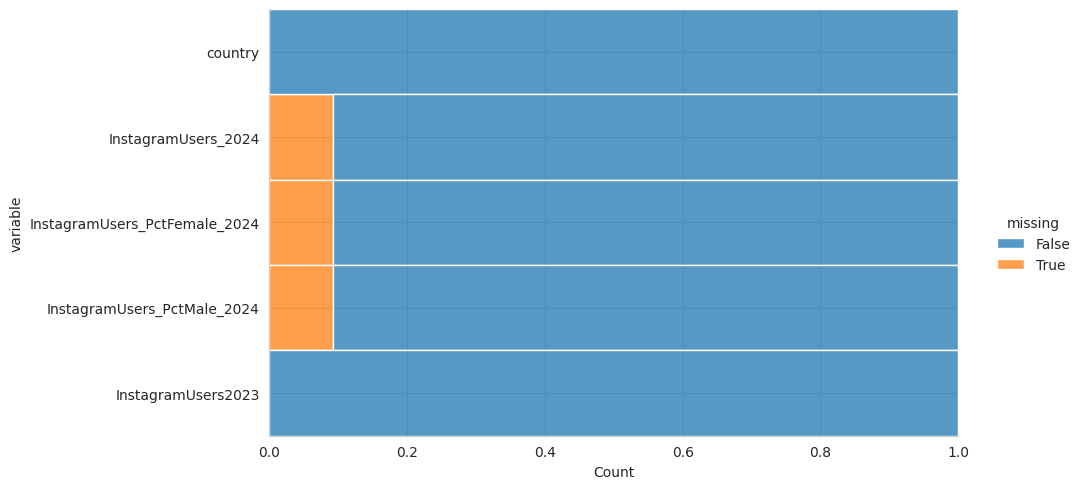

In [110]:
(
    df_instagram
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )

    )
)
plt.show()

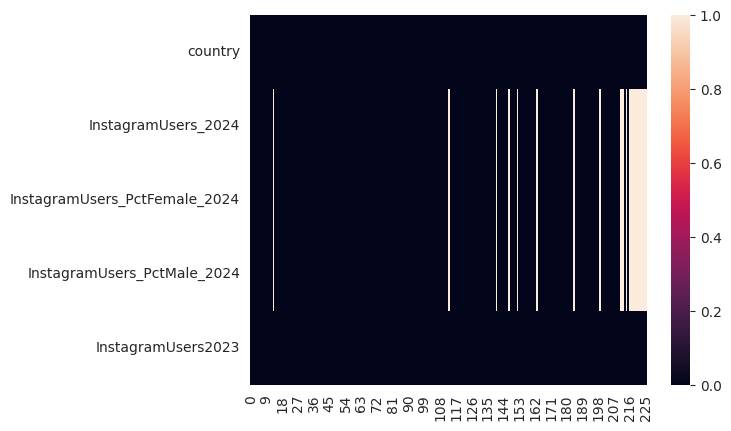

In [111]:
(
    df_instagram
    .isnull()
    .transpose()
    .pipe(
        lambda df : sns.heatmap(data=df)
    )
)
plt.show()

In [112]:
int(df_instagram.shape[0]) - int(df_instagram.dropna().shape[0])

21

In [113]:
(int(df_instagram.shape[0]) - int(df_instagram.dropna().shape[0])) / int(df_instagram.shape[0]) * 100

9.29203539823009

In [114]:
df_instagram = df_instagram.dropna()
df_instagram.shape

(205, 5)

##Estadística Descriptiva

###1 - Medidas de Tendencia Central

###Media

In [115]:
df_instagram.mean(numeric_only=True)

,0
InstagramUsers_2024,8.352472e+06
InstagramUsers_PctFemale_2024,5.035024e+01
InstagramUsers_PctMale_2024,4.965024e+01
InstagramUsers2023,5.805641e+06


###Mediana

In [116]:
df_instagram.median(numeric_only=True)

,0
InstagramUsers_2024,1030700.0
InstagramUsers_PctFemale_2024,54.1
InstagramUsers_PctMale_2024,45.9
InstagramUsers2023,631000.0


###Moda

In [117]:
df_instagram.mode(numeric_only=True)

,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023
0,11200.0,55.8,44.2,1750000
1,52500.0,NaN,NaN,2150000
2,NaN,NaN,NaN,2300000
3,NaN,NaN,NaN,2750000


##2 - Medidas de Dispersión

Rango (Máximos y Mínimos)

In [118]:
df_instagram.min(numeric_only=True)

,0
InstagramUsers_2024,2600.0
InstagramUsers_PctFemale_2024,19.2
InstagramUsers_PctMale_2024,33.9
InstagramUsers2023,2750.0


In [119]:
df_instagram.max(numeric_only=True)

,0
InstagramUsers_2024,392465000.0
InstagramUsers_PctFemale_2024,66.1
InstagramUsers_PctMale_2024,80.8
InstagramUsers2023,229600000.0


Desviación Standar

In [120]:
df_instagram.std(numeric_only=True)

,0
InstagramUsers_2024,3.274025e+07
InstagramUsers_PctFemale_2024,9.245188e+00
InstagramUsers_PctMale_2024,9.244875e+00
InstagramUsers2023,2.077532e+07


### Rango Intercuartítlico

In [121]:
(df_instagram
 .quantile(q=[0.25,0.50,0.75],numeric_only=True)
 .transpose()
 .rename_axis('metric')
 .reset_index()
 .assign(iqr = lambda df: df[0.75] - df[0.25])
 )
plt.show()

###Graficamos medidas centrales y de dispersion de la variable "InstagramUsers_2024"

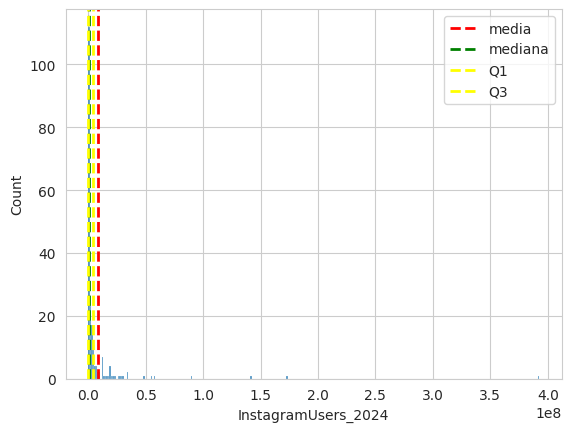

In [122]:
sns.histplot(
    data=df_instagram,
    x='InstagramUsers_2024'
)
plt.axvline(
    x=df_instagram.InstagramUsers_2024.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2,
    label="media"
)
plt.axvline(
    x=df_instagram.InstagramUsers_2024.median(),
    color='green',
    linestyle='dashed',
    linewidth=2,
    label="mediana"
)

plt.axvline(
    x=df_instagram.InstagramUsers_2024.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2,
    label="Q1"
)
plt.axvline(
    x=df_instagram.InstagramUsers_2024.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2,
    label="Q3"
)
plt.legend()
plt.show()

**los usuarios de India son demasiados grandes comparados con otros paieses, por eso el grafico se ve rato

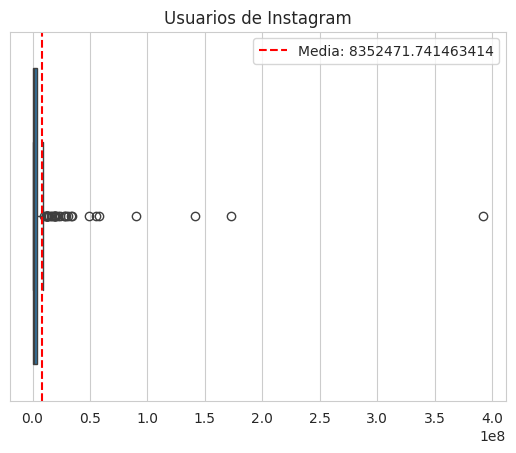

In [123]:
sns.boxplot(x=df_instagram.InstagramUsers_2024)
plt.title("Usuarios de Instagram")
tmp_mean = df_instagram.InstagramUsers_2024.mean()
plt.axvline(tmp_mean, linestyle="dashed", color="red", label=f"Media: {tmp_mean}")
plt.xlabel('')
plt.legend()
plt.show()

###CONTEOS Y PROPORCIONES

In [124]:
df_instagram.describe()

,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023
count,2.050000e+02,205.000000,205.000000,2.050000e+02
mean,8.352472e+06,50.350244,49.650244,5.805641e+06
std,3.274025e+07,9.245188,9.244875,2.077532e+07
min,2.600000e+03,19.200000,33.900000,2.750000e+03
25%,1.277000e+05,46.100000,43.800000,9.370000e+04
50%,1.030700e+06,54.100000,45.900000,6.310000e+05
75%,3.949200e+06,56.200000,53.900000,2.900000e+06
max,3.924650e+08,66.100000,80.800000,2.296000e+08


In [125]:
df_instagram.describe(include=object)

,country
count,205
unique,205
top,India
freq,1


In [127]:
df_instagram.country.unique()

array(['India', 'United States', 'Indonesia', 'Pakistan', 'Nigeria',
       'Brazil', 'Bangladesh', 'Ethiopia', 'Mexico', 'Japan', 'Egypt',
       'Philippines', 'DR Congo', 'Turkey', 'Germany', 'Thailand',
       'United Kingdom', 'Tanzania', 'France', 'South Africa', 'Italy',
       'Kenya', 'Myanmar', 'Colombia', 'South Korea', 'Uganda', 'Spain',
       'Algeria', 'Iraq', 'Argentina', 'Afghanistan', 'Yemen', 'Canada',
       'Poland', 'Morocco', 'Angola', 'Ukraine', 'Uzbekistan', 'Malaysia',
       'Mozambique', 'Ghana', 'Peru', 'Saudi Arabia', 'Madagascar',
       'Ivory Coast', 'Nepal', 'Cameroon', 'Venezuela', 'Niger',
       'Australia', 'Mali', 'Burkina Faso', 'Taiwan', 'Sri Lanka',
       'Malawi', 'Zambia', 'Kazakhstan', 'Chad', 'Chile', 'Romania',
       'Somalia', 'Senegal', 'Guatemala', 'Netherlands', 'Ecuador',
       'Cambodia', 'Zimbabwe', 'Guinea', 'Benin', 'Rwanda', 'Burundi',
       'Bolivia', 'Tunisia', 'South Sudan', 'Haiti', 'Belgium', 'Jordan',
       'Dominican 

##ANALIZAMOS LA VARIABLE CATEGORICA country

###Conteo de Datos

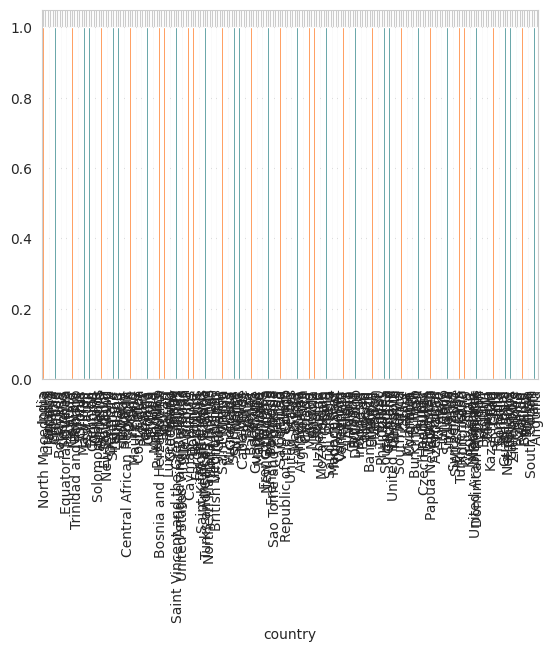

In [128]:
(
    df_instagram
    .country
    .value_counts()
    .plot(
        kind='bar',
        color=claim_color.values()
    )
)
plt.show()

El es unico campo Categorico

### Proporcion de Datos

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


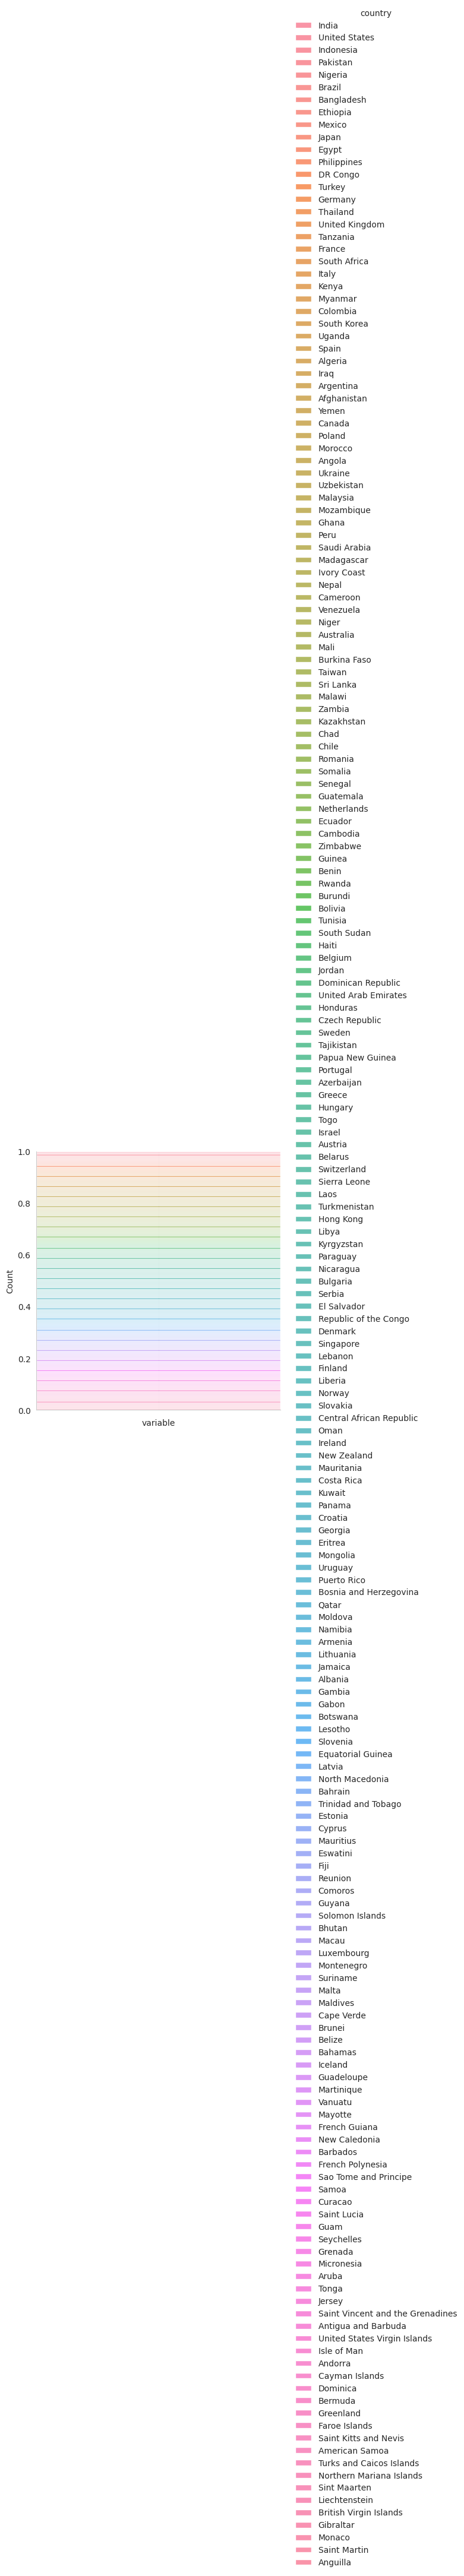

In [129]:
df_instagram['variable'] = ''
(
    df_instagram
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable',
                hue='country',
                multiple='fill'
            )
        )
    )
)
plt.show()

#ANÁLISIS BIVARIADO

In [86]:
df_instagram.head(2)

,country,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023,variable
0,India,392465000.0,33.1,66.9,229600000,
1,United States,172606200.0,55.4,44.6,143400000,


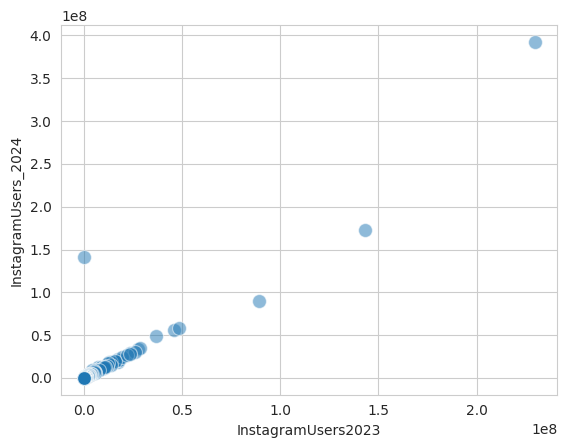

In [88]:
sns.scatterplot(
    data=df_instagram,
    x='InstagramUsers2023',
    y='InstagramUsers_2024',
    alpha=1/2,
    s=100
)
plt.show()

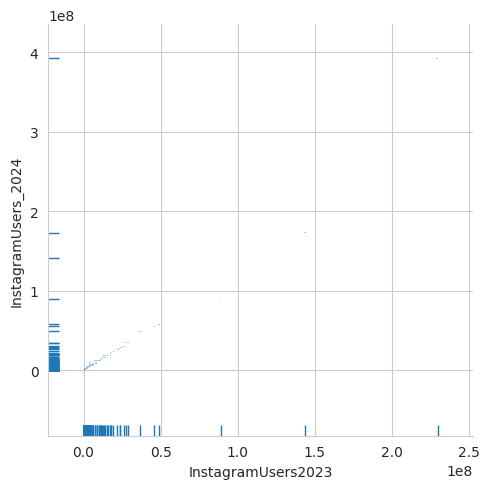

In [90]:
sns.displot(
    data=df_instagram,
    x='InstagramUsers2023',
    y='InstagramUsers_2024',
    rug=True
)
plt.show()

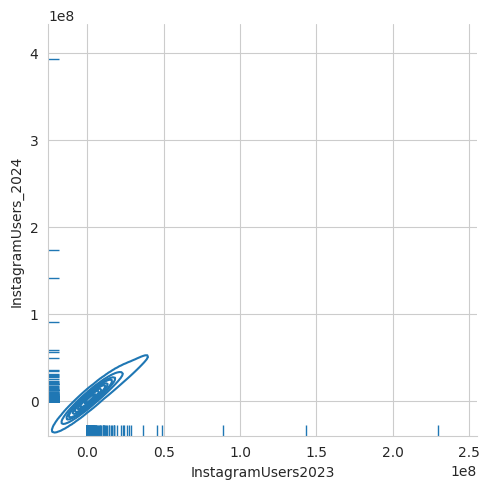

In [91]:
sns.displot(
    data=df_instagram,
    x='InstagramUsers2023',
    y='InstagramUsers_2024',
    kind='kde',
    rug=True
)
plt.show()

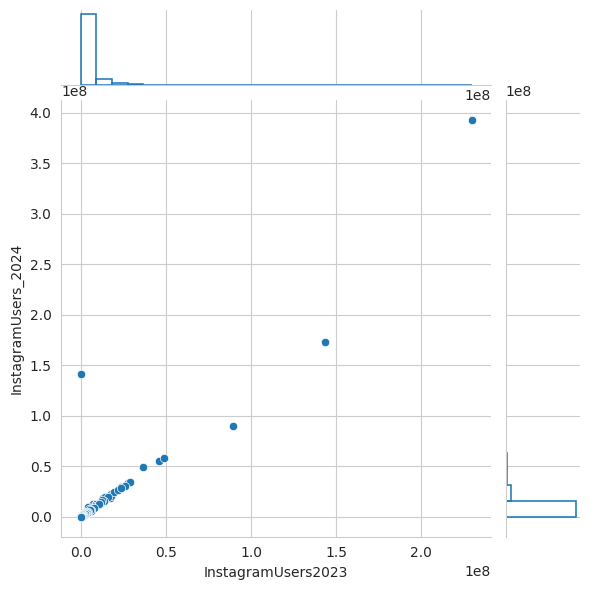

In [92]:
sns.jointplot(
    data=df_instagram,
     x='InstagramUsers2023',
    y='InstagramUsers_2024',
    marginal_kws=dict(bins=25,fill=False)
)
plt.show()

Relaciones entre variables categóricas y numéricas (Violin y Boxplots)

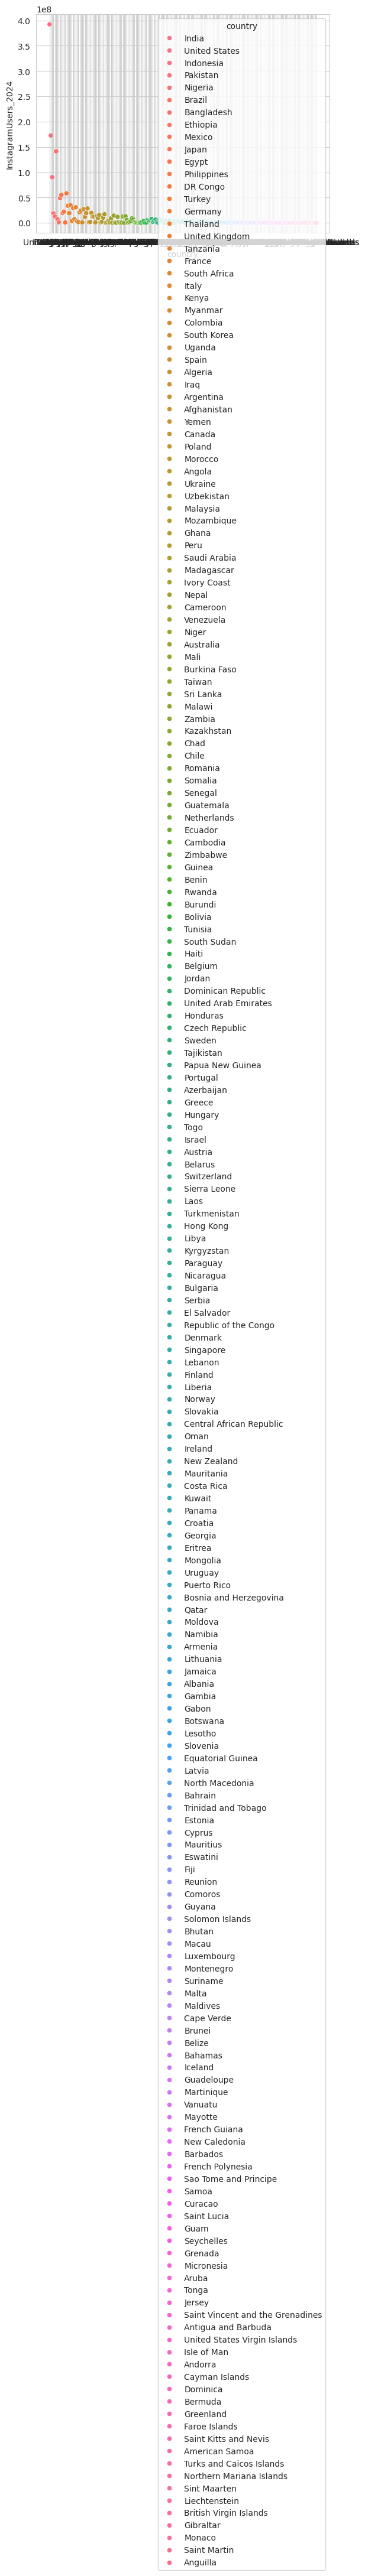

In [94]:
sns.scatterplot(
    data=df_instagram,
    x='country',
    y='InstagramUsers_2024',
    hue='country'
)
plt.show()

Generamos ruido en los valores

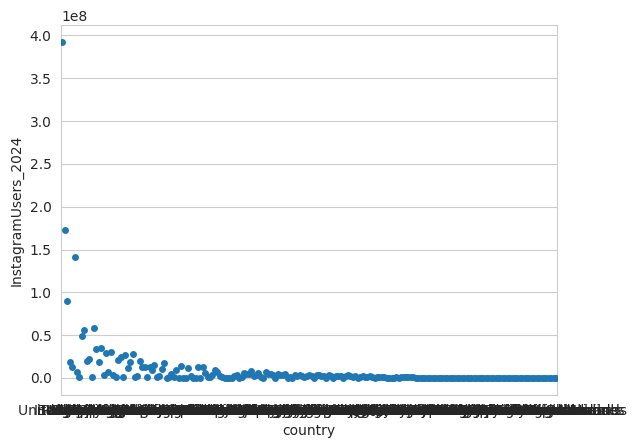

In [97]:
sns.stripplot(
    data=df_instagram,
    x='country',
    y='InstagramUsers_2024'
)
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1261: RuntimeWarning: invalid value encountered in scalar multiply
  loval = q1 - whis * stats['iqr']
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1262: RuntimeWarning: invalid value encountered in scalar multiply
  hival = q3 + whis * stats['iqr']


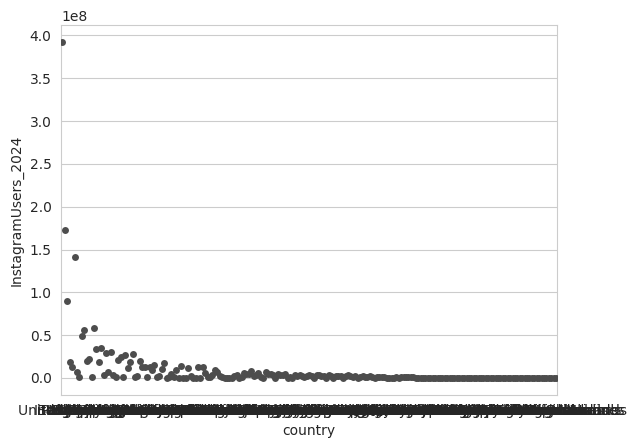

In [98]:
ax = sns.boxplot(
    data=df_instagram,
    x='country',
    y='InstagramUsers_2024',
    whis=np.inf
)

ax = sns.stripplot(
    data=df_instagram,
    x='country',
    y='InstagramUsers_2024',
    palette=countr
    color='.3'
)
plt.show()

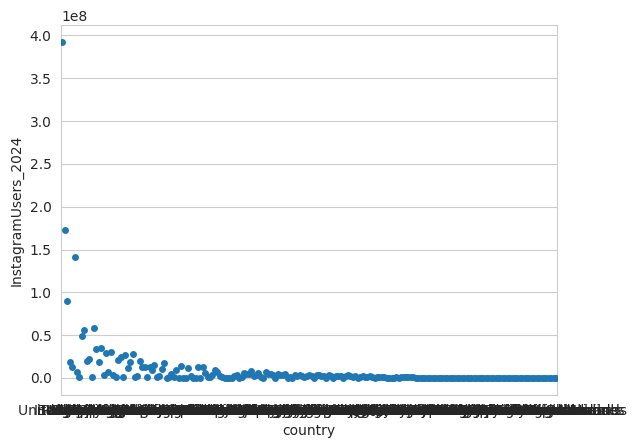

In [100]:
ax = sns.violinplot(
    data=df_instagram,
    x='country',
    y='InstagramUsers_2024',
    color='.8'
)

ax = sns.stripplot(
    data=df_instagram,
    x='country',
    y='InstagramUsers_2024'
)
plt.show()